# BUSINESS PROBLEM: CUSTOMER CHURN PREDICTION


**Business Context:**

AlphaCom, a leading telecommunications provider, has recently experienced a concerning rise in customer churn despite offering competitive services and a wide product portfolio. This increase is directly impacting revenue and undermining brand reputation in an intensely competitive market. Traditional retention strategies have proven inadequate because customer churn is influenced by a complex mix of factors, including service usage, billing preferences, contract types, and demographics. Without clear insights into these patterns, the company is left reacting to churn instead of preventing it.

**Objective:**

As a data scientist at AlphaCom, you are tasked with developing a predictive model to identify customers at high risk of churn and uncover the key factors driving their decisions. Solving this problem will enable the company to proactively design targeted retention strategies, reduce churn-related losses, and improve customer lifetime value, ultimately safeguarding revenue and strengthening AlphaCom’s competitive position.

**Data Description:**

The data contains different attributes related to churn. The detailed data dictionary is given below:

**Gender:** The customer’s gender (e.g., Male or Female). This demographic feature may correlate with customer behavior.

**Age Range:** Indicates the customer’s age bracket (e.g., 18–25, 26–35, etc.), offering demographic insights that can impact churn analysis.

**SeniorCitizen:** A binary indicator (if included) that identifies whether the customer is a senior citizen (commonly 1 for senior, 0 for non-senior). Senior status can influence service preferences and retention strategies.

**Partner:** Indicates whether the customer has a partner. This factor can affect customer loyalty and service usage patterns.

**Dependents:** Specifies whether the customer has dependents. This information can provide context on the customer’s household and influence their service needs.

**Tenure:** The number of months the customer has been with the company. Longer tenure may indicate higher loyalty, while shorter tenure could be a churn risk indicator.

**PhoneService:** Denotes whether the customer subscribes to telephone services. This binary feature (Yes/No) helps understand service adoption.

**MultipleLines:** Indicates if the customer has multiple phone lines. This feature can provide insight into customer behavior and service complexity.

**InternetService:** Describes the type of internet service the customer uses (e.g., DSL, Fiber optic, or None). The type of internet service can be a critical factor in churn analysis.

**OnlineSecurity:** Shows whether the customer subscribes to online security services. This value (Yes/No) may influence customer satisfaction and retention.

**OnlineBackup:** Indicates if the customer has an online backup service. Similar to online security, this can be a part of the overall service bundle affecting churn.

**DeviceProtection:** Specifies whether the customer is enrolled in a device protection plan, providing an added layer of service value.

**TechSupport:** Denotes if the customer subscribes to technical support services. Access to tech support can improve customer experience and reduce churn.

**StreamingTV:** Indicates whether the customer subscribes to a streaming TV service. Media consumption patterns can be a differentiator in customer preferences.

**StreamingMovies:** Specifies if the customer subscribes to a streaming movies service. This, combined with other services, can highlight trends in customer behavior.

**Contract:** Describes the type of contract the customer holds (e.g., month-to-month, one-year, or two-year). Contract type is a strong indicator of churn risk—shorter contracts are often associated with higher churn.

**PaperlessBilling:** Indicates whether the customer is enrolled in paperless billing. This operational feature can sometimes correlate with customer engagement levels.

**PaymentMethod:** Details the payment method used by the customer (e.g., electronic check, mailed check, bank transfer, or credit card). Payment methods can affect both churn and overall customer satisfaction.

**MonthlyCharges:** The monthly amount in $ USD charged to the customer. Higher charges might increase the likelihood of churn if customers perceive the cost as too high for the value provided.

**TotalCharges:** The cumulative amount in $ USD charged over the customer’s tenure. This helps in understanding the long-term value of each customer and can be a predictor of churn.

**Churn:** The target variable indicating whether the customer has left (typically denoted as “Yes” or “No”). This is the primary outcome you aim to predict with your machine learning model.


**ImportantNote:**

Reasons why TotalCharges might not exactly equal Tenure × MonthlyCharges:

Prorated Billing & Partial Months: If a customer signs up or cancels partway through a billing cycle, their first or last month’s charge may be prorated (i.e., only for the days they actually had service), so it won’t match a full “monthly” amount.

One-Off Fees and Credits: Installation fees, equipment charges, early-termination fees, late-payment penalties, or promotional credits can all be applied directly to TotalCharges without affecting the regular MonthlyCharges.

## CONCISE SUMMARY
1. BUSINESS PROBLEM :-
AlphaCom is facing a rising customer churn rate despite offering competitive telecom services and a wide product portfolio. This churn is negatively impacting revenue, customer lifetime value, and brand perception in an intensely competitive market.The core business challenge is that existing retention strategies are reactive rather than proactive, because the drivers of churn are multidimensional—spanning service usage, pricing, contract types, billing behavior, and customer demographics.
Without the ability to predict which customers are likely to churn and why, AlphaCom is unable to intervene early with targeted retention actions, leading to avoidable revenue loss and weakened competitive positioning.

2. TARGET VARIABLE :- **"CHURN"** is Primary Target Variable.
   
   Type: Binary classification variable
   
   Values:
   
   Yes → Customer has churned

   No → Customer is retained

*All other variables (tenure, contract type, charges, service subscriptions, billing behavior, demographics) act as predictor features explaining churn behavior.*

3. MODEL PERFORMANCE METRICS :- Since churn prediction is a classification problem with business cost asymmetry, the key metrics are :
   
   Recall (Churn = Yes) :- Most critical metric. It measures the model’s ability to correctly identify customers who are likely to churn. High recall ensures fewer churners are missed.
   
   Precision (Churn = Yes):- Ensures retention efforts are not wasted on low-risk customers. Important for cost efficiency of campaigns.
   
   F1-Score:- Balances precision and recall.Useful for overall model robustness.
   
   ROC-AUC:- Measures the model’s ability to distinguish between churners and non-churners across thresholds.

 ***The project is successful if AlphaCom can accurately predict churn, understand its drivers, and proactively retain high-risk customers, leading to measurable improvements in revenue retention and customer lifetime value.***


# LIBRARY LOADING

In [1]:
# Necessary Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)

# Handling Class Imbalance
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Features selection
from sklearn.feature_selection import (
    SelectKBest,
    chi2,
    f_classif
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

# Pipeline & Model tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



# DATA LOADING

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Load & Read dataset
file_path = '/content/drive/MyDrive/customer_churn.csv'
df = pd.read_csv(file_path)

# DATASET OVERVIEW

In [4]:
# Shape of dataset
print("The shape of dataset is:",df.shape)
print("_"*100)

# Preview Head of dataset
print("The first 5 rows of dataset are:")
print(df.head())
print("_"*100)

# Preview Tail of dataset
print("The last 5 rows of dataset are:")
print(df.tail())
print("_"*100)

# Preview Information of dataset
print("The information of data are:")
print(df.info())
print("_"*100)

# Missing values in dataset
print("The missing values in dataset are:")
print(df.isnull().sum())


The shape of dataset is: (12055, 20)
____________________________________________________________________________________________________
The first 5 rows of dataset are:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No     1.0           No   
1    Male              0      No         No    34.0          Yes   
2    Male              0      No         No     2.0          Yes   
3    Male              0      No         No    45.0           No   
4  Female              0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtectio

**Observation :-**
*   Total records (customers) = 12055
* Total Columns = 20
*  Data types: int, float, object divided into categorical columns(18) and numerical columns(2).
* Missing values (Non-Null Count) = "Tenure" column has 604 missing values.

**Telecom Customer churn dataset have :-**

**Demographic data** = Gender, Senior citizens, Partner, Dependents

**Service Taken** = Phone, Internet, add-ons

**Contract & Billing details**

**Charges**

**Churn** - "Target Variables"

***The preview clearly shows the data is NOT clean and has missing values.***


# PHASE 1 : DATASET STRUCTURAL CLEANING

In [5]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Standardize categorical Text values
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()

# Fix Monetary columns structure
for col in ['monthlycharges', 'totalcharges']:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r'[^0-9.]', '', regex=True)
        .replace('', np.nan)
        .astype(float)
    )

# Fix Target Variable structure
df['churn'] = df['churn'].map({'yes': 1, 'no': 0})

# Standardize Binary Service columns
binary_cols = [
    'partner', 'dependents', 'phoneservice', 'paperlessbilling',
    'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies', 'multiplelines'
]

for col in binary_cols:
    df[col] = df[col].replace({
        'yes': 1,
        'no': 0,
        'no phone service': 0,
        'no internet service': 0
    })

# Ensure correct Numeric types
df['seniorcitizen'] = df['seniorcitizen'].astype(int)

# Structural Validation checks
print("Phase -1 cleaned data information:",df.info())
print("_" * 100)
print("Missing values after structural cleaning:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            12055 non-null  object 
 1   seniorcitizen     12055 non-null  int64  
 2   partner           12055 non-null  int64  
 3   dependents        12055 non-null  int64  
 4   tenure            11451 non-null  float64
 5   phoneservice      12055 non-null  int64  
 6   multiplelines     12055 non-null  int64  
 7   internetservice   12055 non-null  object 
 8   onlinesecurity    12055 non-null  int64  
 9   onlinebackup      12055 non-null  int64  
 10  deviceprotection  12055 non-null  int64  
 11  techsupport       12055 non-null  int64  
 12  streamingtv       12055 non-null  int64  
 13  streamingmovies   12055 non-null  int64  
 14  contract          12055 non-null  object 
 15  paperlessbilling  12055 non-null  int64  
 16  paymentmethod     12055 non-null  object

**Observation**
* Ensure consistent column access.
* Prevent duplicate categories.
* Handles ,dollar sign,commas, spaces etc..
* Converts $nan-type values
* Prevents unintended object/float issues.
* Correct dtypes.

Dataset is now:
* Structurally clean
* Machine-readable
* Ready for EDA
* Ready for Phase 2 – Analytical Cleaning

# EXPLORATORY DATA ANALYSIS

## Target Variable "CHURN" analysis

In [6]:
# Target distribution - count
print("Churn value counts:")
print(df['churn'].value_counts())
print("_" * 50)

# Target distribution - percentage
print("Churn percentage distribution:")
print(df['churn'].value_counts(normalize=True) * 100)


Churn value counts:
churn
0    8650
1    3405
Name: count, dtype: int64
__________________________________________________
Churn percentage distribution:
churn
0    71.754459
1    28.245541
Name: proportion, dtype: float64


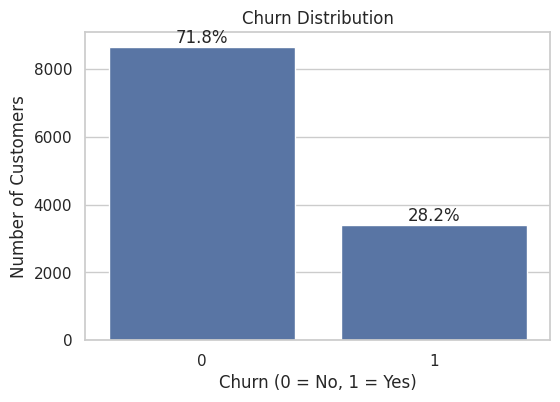

In [7]:
# Visualization
plt.figure(figsize=(6,4))
ax = sns.countplot(x='churn', data=df)

for p in ax.patches:
    percentage = (p.get_height() / len(df)) * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()


**Observation**

The target variable exhibits significant class imbalance, with non-churn customers dominating the dataset. This necessitates the use of imbalance-handling techniques and evaluation metrics beyond accuracy to ensure effective churn prediction.

## Univariate analysis

### Tenure

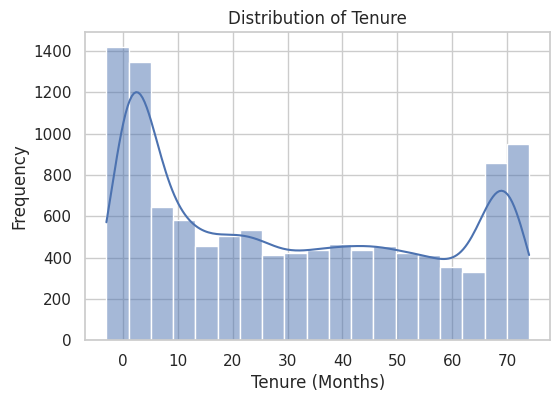

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()


**Observation**

* Distribution is right-skewed, with high concentration of customers toward lower tenure values.
* This indicates that a large number of customers are relatively new, while fewer customers have long-term association.
* The skewness suggests that tenure may have a strong influence on churn behavior, especially in early customer life cycles.


### MonthlyCharges

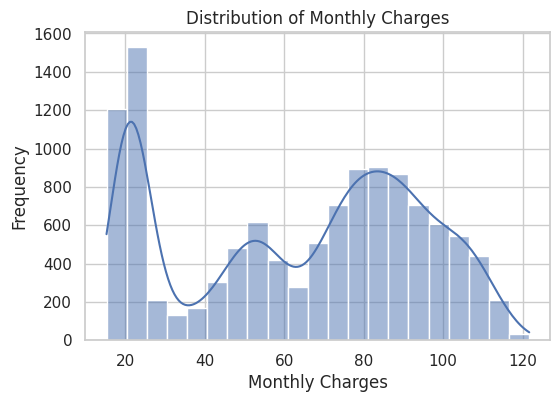

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['monthlycharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()


**Observation**

* Monthly charges show a moderately skewed distribution, spread across a wide range of values.

* The presence of higher charge values indicates diverse pricing plans and service bundles.

* The wide spread suggests that monthly charges could be a key differentiating factor among customers.

### Totalcharges


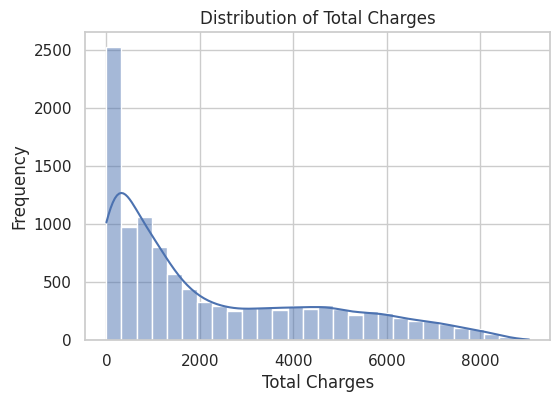

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['totalcharges'], kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()


**Observation**

* Total charges exhibit a heavily right-skewed distribution, with most customers clustered at lower values.

* This pattern is expected, as total charges accumulate over time and are influenced by tenure.

* The skewness indicates a strong dependence on customer duration, making this variable closely related to tenure.


### Gender

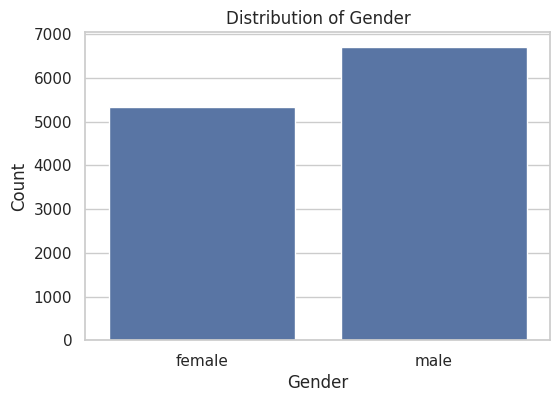

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Observation**

* The gender distribution appears to be fairly balanced across customers.

* No extreme dominance of any single category is observed.

* This suggests that gender alone may not be a strong standalone predictor of churn.

### Contract


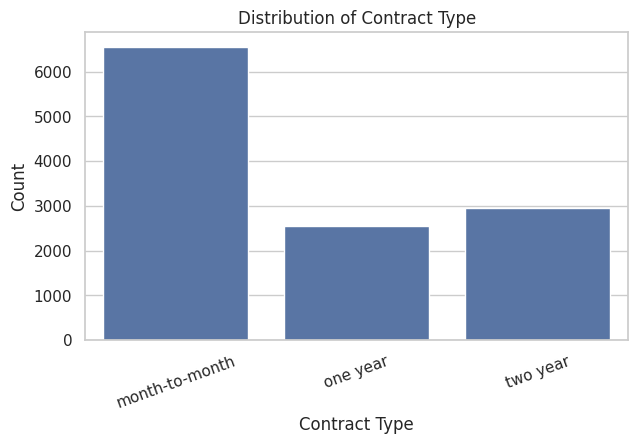

In [12]:
plt.figure(figsize=(7,4))
sns.countplot(x='contract', data=df)
plt.title('Distribution of Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()


**Observation**

* A significant proportion of customers are on month-to-month contracts.

* Fewer customers opt for long-term contracts such as one-year or two-year plans.

* This indicates that a large segment of customers may have lower commitment levels, which can influence churn risk.


### Paymentmethod

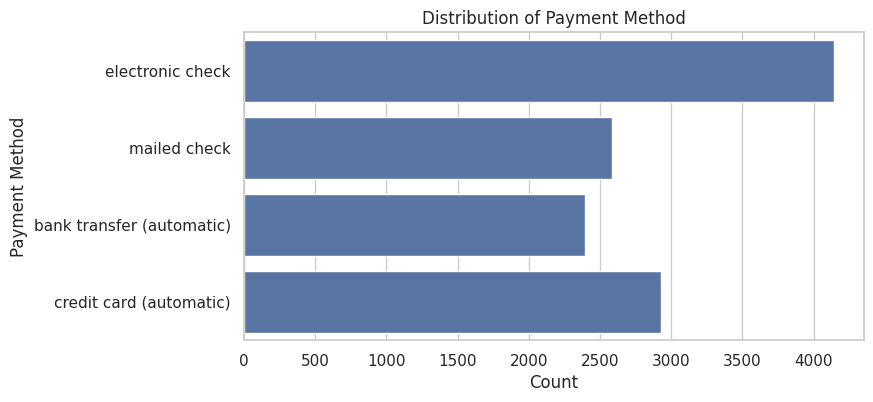

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(y='paymentmethod', data=df)
plt.title('Distribution of Payment Method')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()


**Observation**

* Multiple payment methods are used by customers, with certain methods being more prevalent.

* The variation in payment preferences indicates behavioral diversity across customers.

* Payment method may serve as a proxy for customer engagement or convenience preference.

### SeniorCitizen


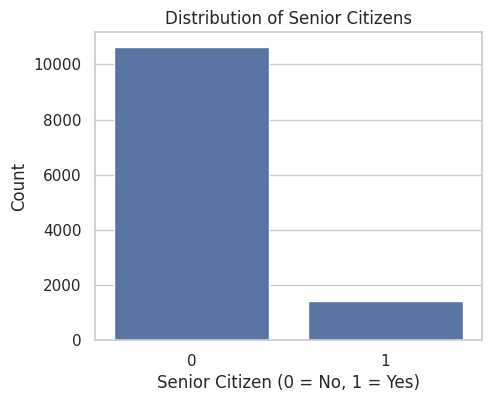

In [14]:
plt.figure(figsize=(5,4))
sns.countplot(x='seniorcitizen', data=df)
plt.title('Distribution of Senior Citizens')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


**Observation**

* The majority of customers are not senior citizens.

* Senior citizens form a smaller segment of the customer base.

* This imbalance suggests that senior citizen status may represent a distinct but limited demographic group.

### Partner


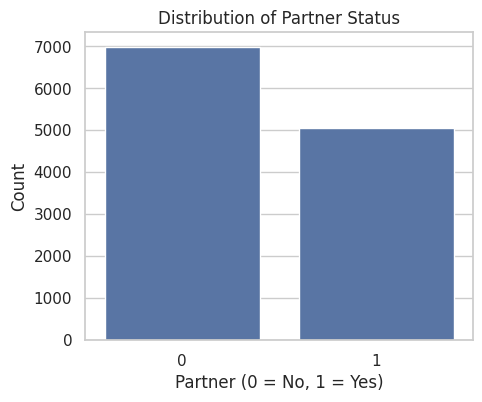

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x='partner', data=df)
plt.title('Distribution of Partner Status')
plt.xlabel('Partner (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


**Observation**

* Customers are fairly distributed between having and not having a partner.

* No extreme dominance of a single category is observed.

* Partner status may reflect household or family structure among customers.

### Dependents


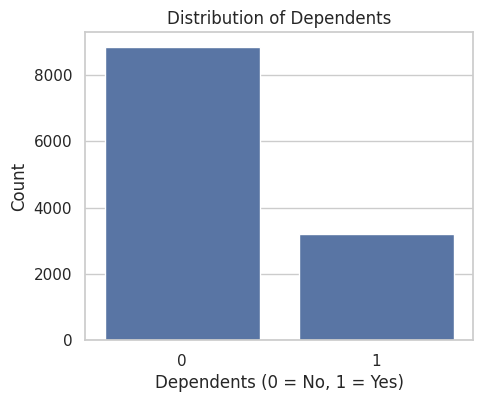

In [16]:
plt.figure(figsize=(5,4))
sns.countplot(x='dependents', data=df)
plt.title('Distribution of Dependents')
plt.xlabel('Dependents (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


**Observation**

* A higher proportion of customers do not have dependents.

* Customers with dependents form a smaller share of the dataset.

* This variable captures differences in household responsibility levels.

### Phoneservice

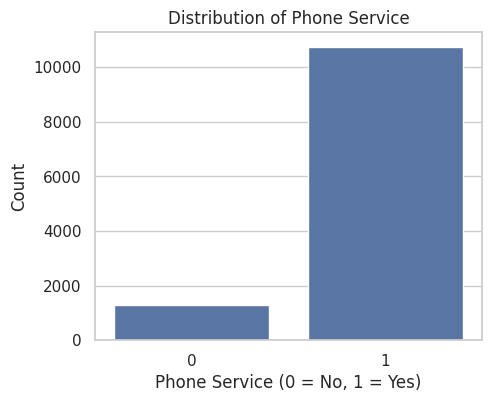

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(x='phoneservice', data=df)
plt.title('Distribution of Phone Service')
plt.xlabel('Phone Service (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


**Observation**

* Most customers have phone service enabled.

* Customers without phone service form a minor segment.

* This indicates phone service is a core offering for most customers.


### Multiplelines

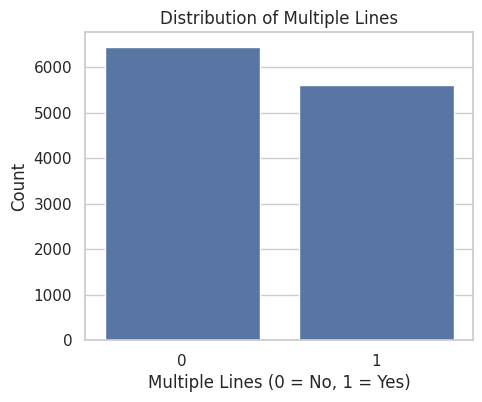

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x='multiplelines', data=df)
plt.title('Distribution of Multiple Lines')
plt.xlabel('Multiple Lines (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


**Observation**

* Customers are distributed between single-line and multiple-line usage.

* A noticeable proportion of customers do not subscribe to multiple lines.

* This variable reflects usage intensity of phone services.

### Internetservice

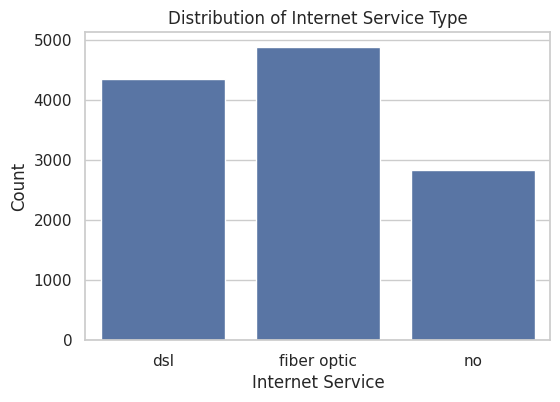

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='internetservice', data=df)
plt.title('Distribution of Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()


**Observation**

* Customers are distributed across different internet service types.

* Certain service types have higher adoption compared to others.

* This suggests heterogeneity in service offerings and technology preference.

### Onlinesecurity

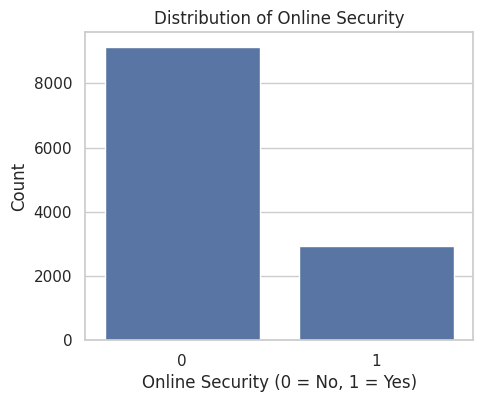

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(x='onlinesecurity', data=df)
plt.title('Distribution of Online Security')
plt.xlabel('Online Security (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


**Observation**

* A substantial portion of customers do not subscribe to online security.

* Adoption of online security services is comparatively lower.

* This may indicate optional add-on services rather than core usage.

### Onlinebackup


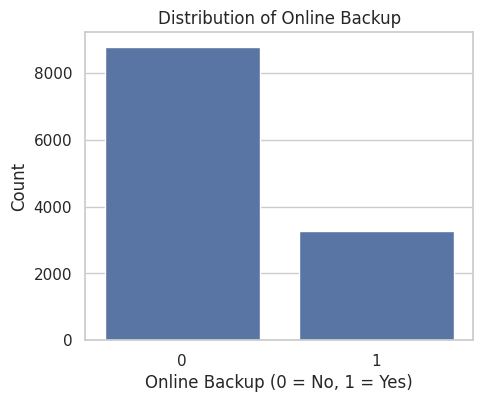

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(x='onlinebackup', data=df)
plt.title('Distribution of Online Backup')
plt.xlabel('Online Backup (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


**Observation**

* Customers are unevenly distributed between having and not having online backup.

* A larger share of customers do not opt for this service.

* Online backup appears to be an optional value-added feature.

### Deviceprotection


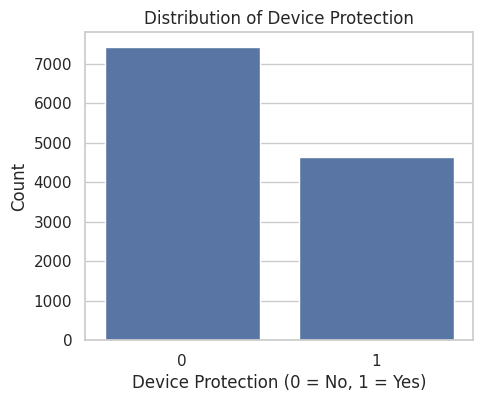

In [22]:
plt.figure(figsize=(5,4))
sns.countplot(x='deviceprotection', data=df)
plt.title('Distribution of Device Protection')
plt.xlabel('Device Protection (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


**Observation**

* A considerable number of customers do not have device protection enabled.

* Subscription to device protection is not universal.

* This variable reflects customer preference for risk mitigation services.

### Techsupport

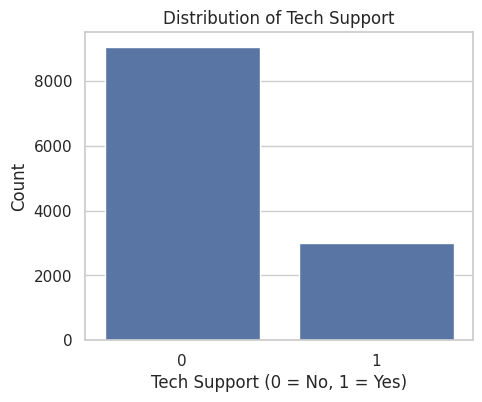

In [23]:
plt.figure(figsize=(5,4))
sns.countplot(x='techsupport', data=df)
plt.title('Distribution of Tech Support')
plt.xlabel('Tech Support (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


**Observation**

* Many customers do not subscribe to technical support services.

* Tech support adoption varies significantly across the dataset.

* This suggests differences in customer self-reliance or service needs.

### Streamingtv

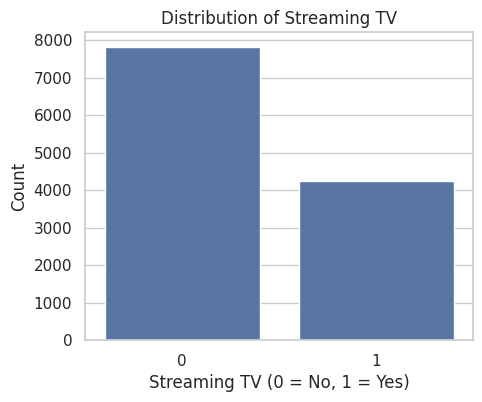

In [24]:
plt.figure(figsize=(5,4))
sns.countplot(x='streamingtv', data=df)
plt.title('Distribution of Streaming TV')
plt.xlabel('Streaming TV (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


**Observation**

* Streaming TV usage is split between subscribers and non-subscribers.

* Adoption is neither minimal nor universal.

* This indicates content consumption diversity among customers.

### Streamingmovies

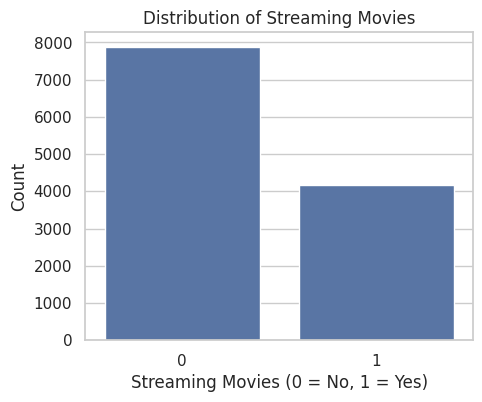

In [25]:
plt.figure(figsize=(5,4))
sns.countplot(x='streamingmovies', data=df)
plt.title('Distribution of Streaming Movies')
plt.xlabel('Streaming Movies (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


**Observation**

* Customers show mixed adoption of streaming movie services.

* Similar distribution patterns to streaming TV are observed.

* This reflects varying entertainment preferences.

### Paperlessbilling

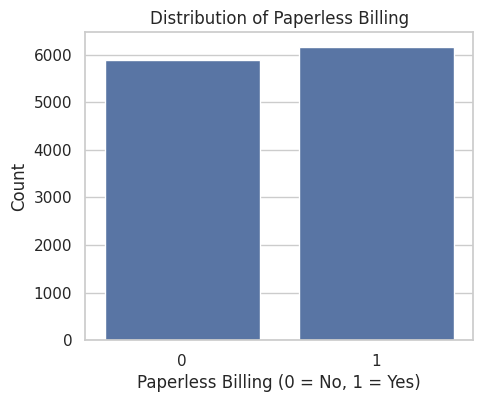

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(x='paperlessbilling', data=df)
plt.title('Distribution of Paperless Billing')
plt.xlabel('Paperless Billing (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


**Observation**

* The near-balanced distribution highlights the coexistence of digital and non-digital customer segments within the dataset.

* Paperless billing appears to be a widely accepted but not universal practice, making it a potentially meaningful behavioral attribute for further analysis.

###Paymentmethod

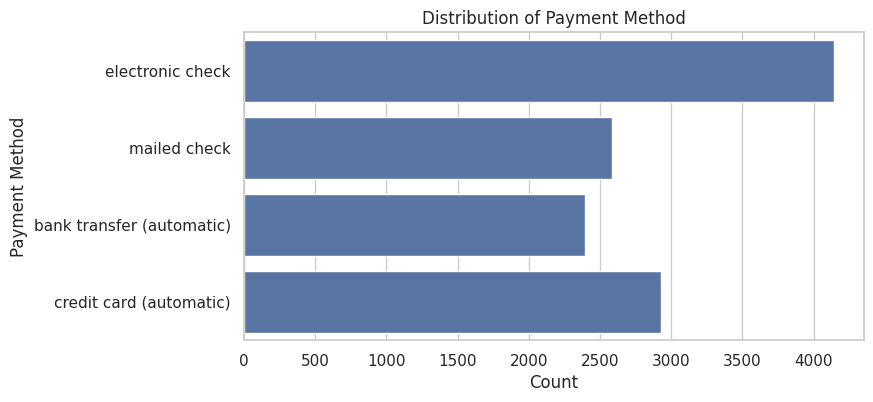

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(y='paymentmethod', data=df)
plt.title('Distribution of Payment Method')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()


**Observation**

* Customers use a variety of payment methods.

* Some payment methods are more prevalent than others.

* This diversity highlights different transaction and convenience preferences

### **Inference from Univariate Analysis**

Univariate analysis indicates a diverse customer base with variability across tenure, pricing, service adoption, billing preferences, and contract types, suggesting that churn behavior is influenced by multiple interacting factors rather than any single attribute.

## Bivariate Analysis

### Numerical Variables vs Churn

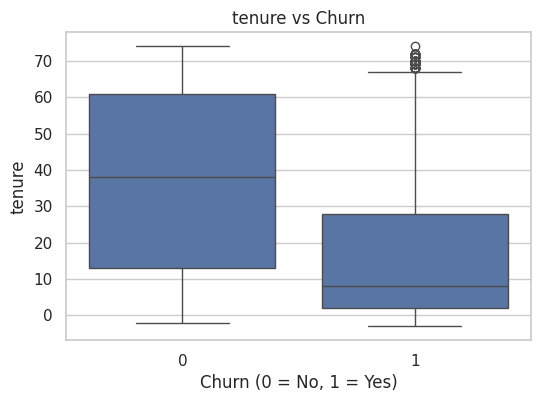

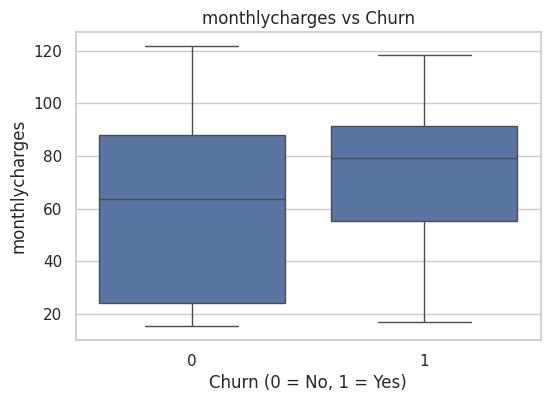

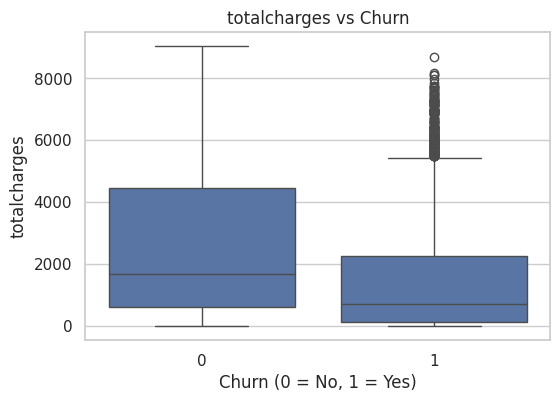

In [28]:
num_cols = ['tenure', 'monthlycharges', 'totalcharges']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn (0 = No, 1 = Yes)')
    plt.ylabel(col)
    plt.show()


**Observation**

* Tenure: Customers who churn tend to have significantly lower tenure, indicating higher churn risk during early customer lifecycle.

* Monthly Charges: Churned customers generally exhibit higher monthly charges, suggesting possible price sensitivity.

* Total Charges: Non-churn customers show higher total charges, largely reflecting longer tenure rather than higher spending rate.

### Demographic variables vs churn

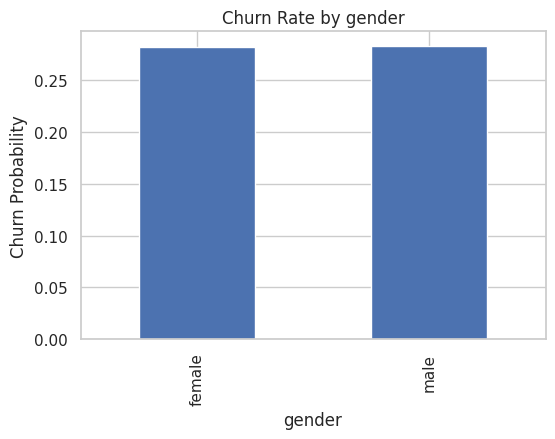

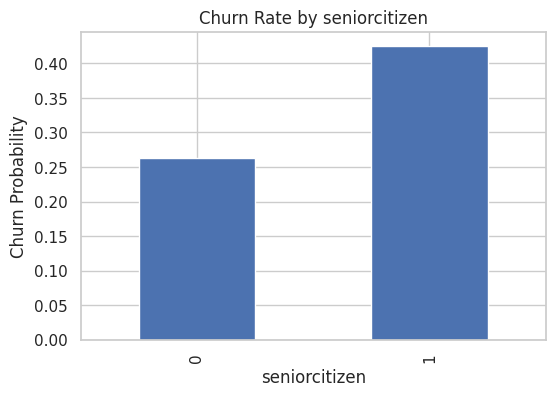

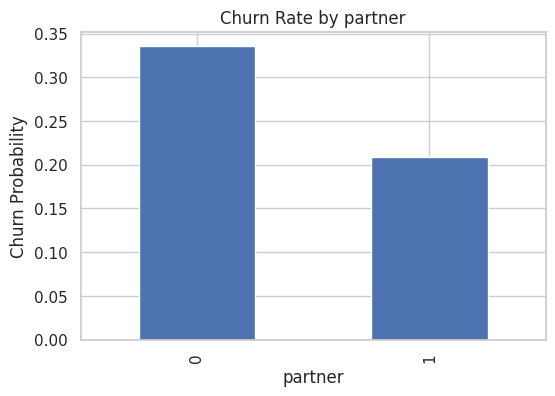

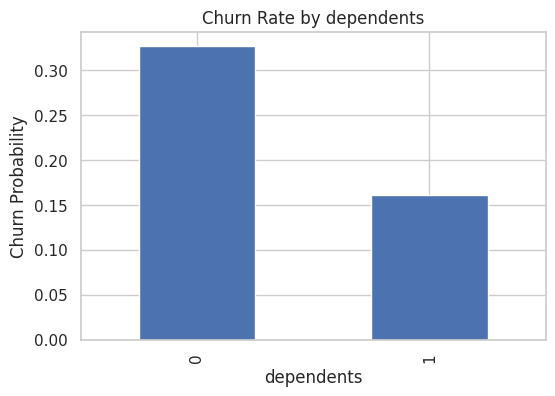

In [29]:
demo_cols = ['gender', 'seniorcitizen', 'partner', 'dependents']

for col in demo_cols:
    churn_rate = df.groupby(col)['churn'].mean()

    plt.figure(figsize=(6,4))
    churn_rate.plot(kind='bar')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Probability')
    plt.show()


**Observation**

* Gender: Churn rates are relatively similar, indicating minimal differential impact.

* Senior Citizen: Senior citizens show a higher churn rate, suggesting distinct behavioral patterns.

* Partner & Dependents: Customers without partners or dependents tend to churn more, indicating potential links between household stability and retention.


### Service usage variables vs churn

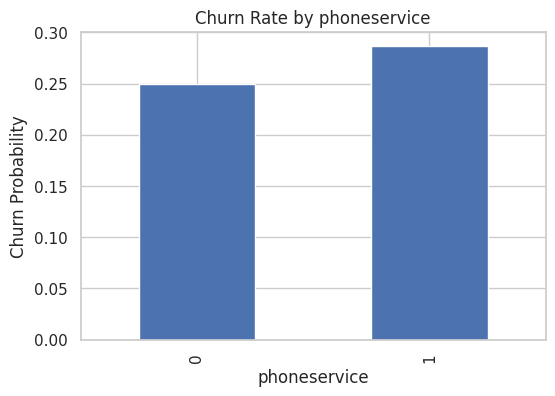

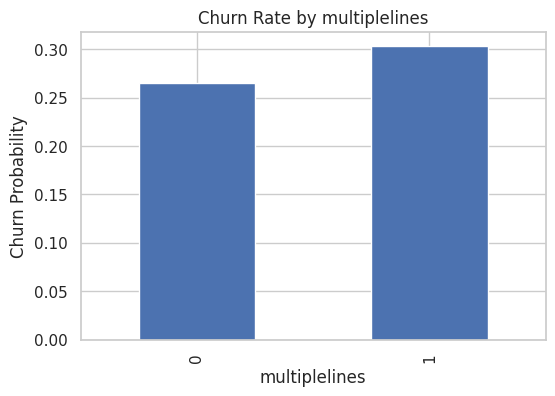

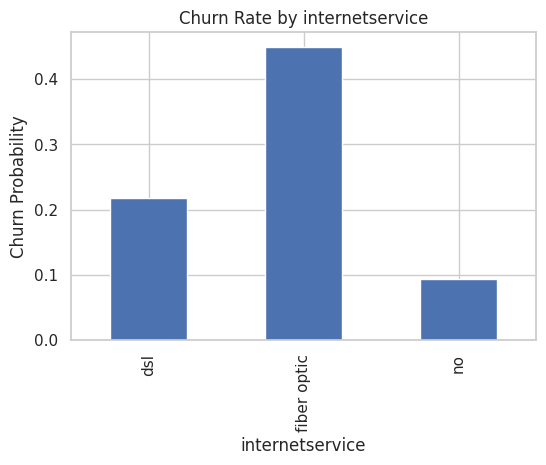

In [30]:
service_cols = ['phoneservice', 'multiplelines', 'internetservice']

for col in service_cols:
    churn_rate = df.groupby(col)['churn'].mean()

    plt.figure(figsize=(6,4))
    churn_rate.plot(kind='bar')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Probability')
    plt.show()


**Observation**

* Phone Service: Minimal churn differentiation; likely a baseline service.

* Multiple Lines: Customers without multiple lines show slightly higher churn.

* Internet Service: Certain internet service types exhibit noticeably higher churn, indicating service-quality or expectation mismatches.

### Add-on services vs churn

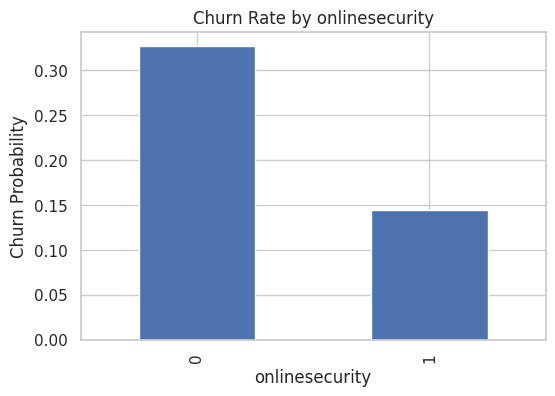

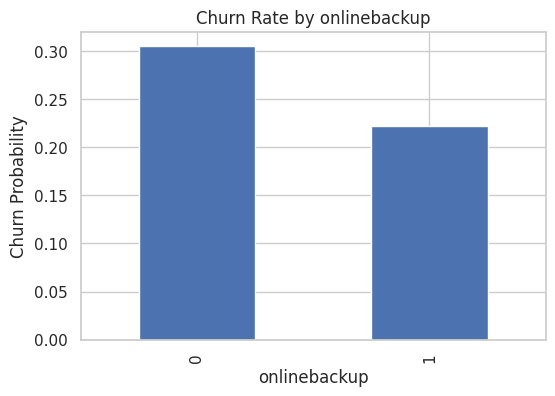

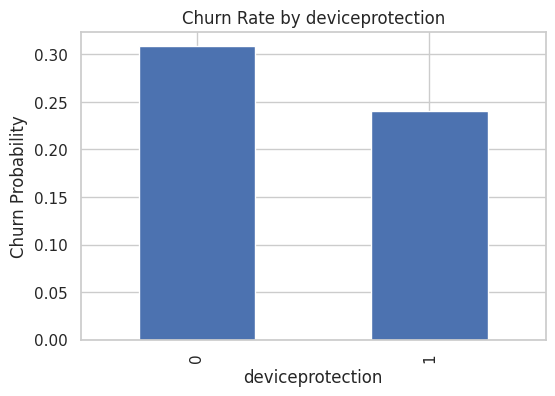

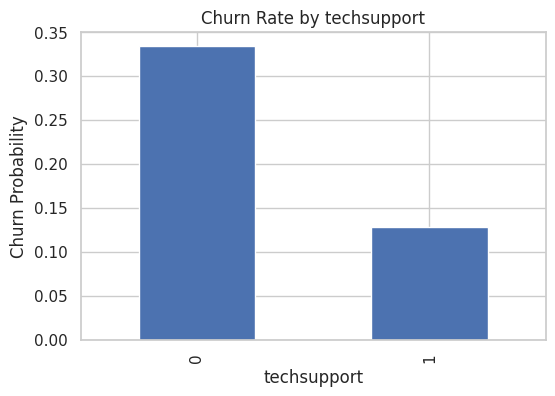

In [31]:
addon_cols = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport']

for col in addon_cols:
    churn_rate = df.groupby(col)['churn'].mean()

    plt.figure(figsize=(6,4))
    churn_rate.plot(kind='bar')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Probability')
    plt.show()


**Observation**

* Customers without add-on services consistently show higher churn rates.

* Presence of these services appears to be associated with greater customer stickiness.

* These features likely capture engagement depth rather than basic usage.

### Entertainment services vs churn

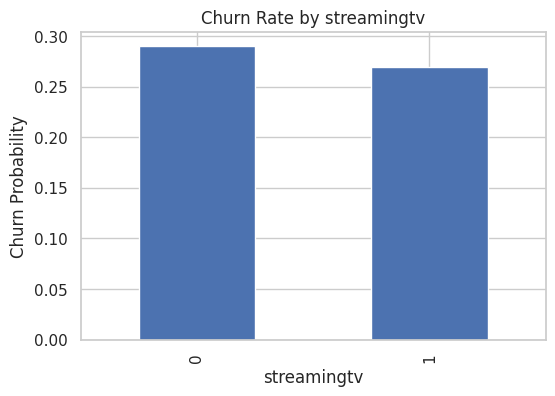

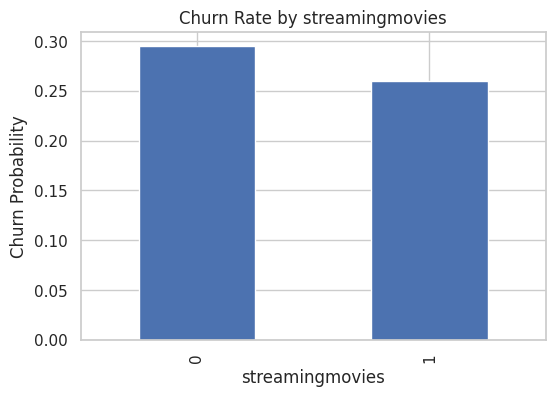

In [32]:
entertainment_cols = ['streamingtv', 'streamingmovies']

for col in entertainment_cols:
    churn_rate = df.groupby(col)['churn'].mean()

    plt.figure(figsize=(6,4))
    churn_rate.plot(kind='bar')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Probability')
    plt.show()


**Observation**

* Customers not subscribing to streaming services show higher churn rates.

* Streaming services may act as engagement enhancers, increasing perceived value.

### Billing & Payment variables vs churn

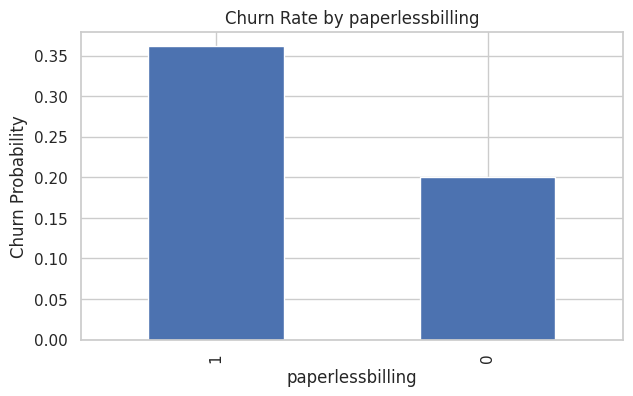

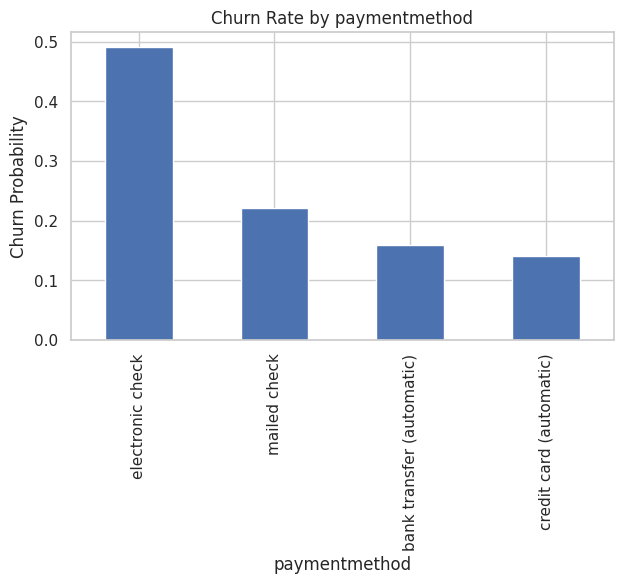

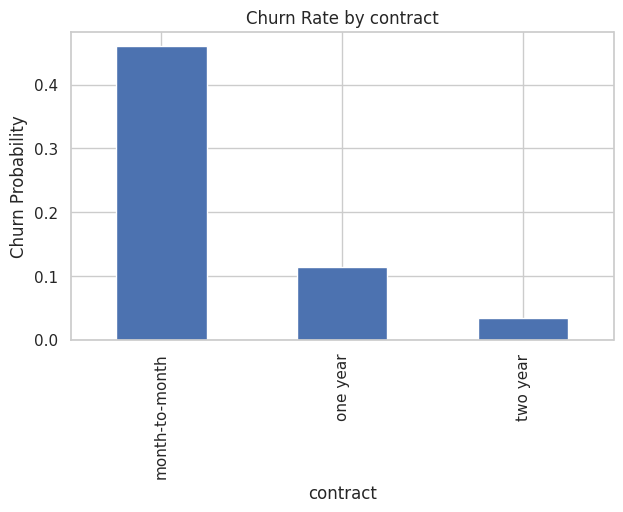

In [33]:
billing_cols = ['paperlessbilling', 'paymentmethod', 'contract']

for col in billing_cols:
    churn_rate = df.groupby(col)['churn'].mean().sort_values(ascending=False)

    plt.figure(figsize=(7,4))
    churn_rate.plot(kind='bar')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Probability')
    plt.show()


**Observation**

* Paperless Billing: Customers using paperless billing show higher churn, possibly reflecting self-service segments.

* Payment Method: Electronic check users exhibit the highest churn rate, distinguishing them from automated payment users.

* Contract Type: Month-to-month contracts show substantially higher churn, while long-term contracts show strong retention.

**Bivariate Inference**

Bivariate analysis reveals that churn is strongly associated with customer tenure, pricing, contract type, payment behavior, and service adoption. Short-tenure customers on flexible contracts, higher monthly charges, electronic payment methods, and limited service add-ons exhibit higher churn propensity, indicating churn is driven by both commitment level and engagement depth.

## Multicollinearity Detection - Correlation Matrix

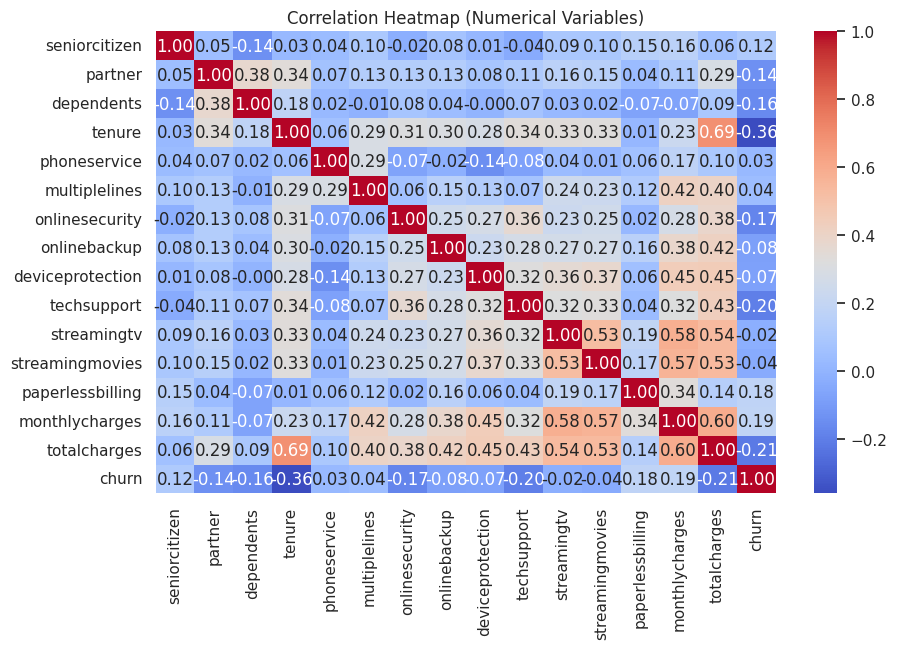

In [34]:
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()


**Observation**

“Multicollinearity is primarily observed among tenure, total charges, and related service variables, while most features exhibit low interdependence, indicating a largely non-redundant feature set.”

* Tenure shows a moderate negative correlation with churn, indicating lower churn likelihood among long-tenured customers.

* Monthly charges have a weak positive correlation with churn, suggesting higher pricing is associated with slightly higher churn risk.

* Total charges are strongly correlated with tenure, reflecting their cumulative relationship and indicating potential multicollinearity.

* Monthly charges and total charges exhibit moderate correlation, driven by pricing effects over time.

* Streaming TV and streaming movies are moderately to strongly correlated, indicating overlapping service adoption.

* Add-on services (online security, backup, device protection, tech support) show moderate inter-correlation, reflecting bundled usage patterns.

* Most other variables show low correlation, suggesting limited redundancy across predictors.

# PHASE 2 : DATASET ANALYTICAL CLEANING

## Missing value treatment
Rationale (from EDA):-

* Missing values exist in numerical columns

* Distributions are skewed → median is robust

In [35]:
# Check missing values before treatment
df.isnull().sum()


,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,604
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


In [36]:
# Median imputation for numerical variables
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


In [37]:
# Recheck missing values
df.isnull().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


## Outlier Assessment
Rationale:-

* Skewness observed in monthlycharges and totalcharges

* Outliers are business-valid (high spenders / long tenure)

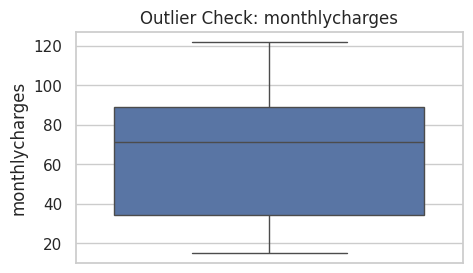

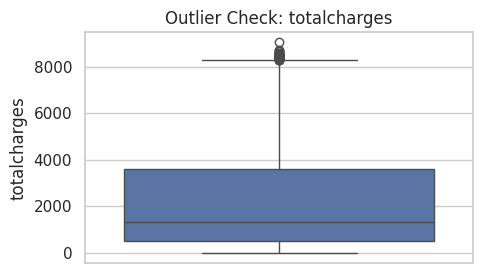

In [38]:
for col in ['monthlycharges', 'totalcharges']:
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[col])
    plt.title(f'Outlier Check: {col}')
    plt.show()


***No outlier removal as they represent genuine customer behaviour.***

## Data type validation(Final Check)

In [39]:
df.dtypes

,0
gender,object
seniorcitizen,int64
partner,int64
dependents,int64
tenure,float64
phoneservice,int64
multiplelines,int64
internetservice,object
onlinesecurity,int64
onlinebackup,int64


## Final dataset Integrity check

In [40]:
print("Final Shape:", df.shape)
print("_" * 50)
print("Final Missing Values:")
print(df.isnull().sum())


Final Shape: (12055, 20)
__________________________________________________
Final Missing Values:
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64


# FEATURE ENGINEERING

## Tenure-Based Feature Engineering
Rationale:-
EDA showed:

* Strong churn association with early tenure

* Non-linear relationship

In [41]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1_year', '1-2_years', '2-4_years', '4-6_years']
)


## Customer value Indicator(Average Monthly Send)
Rationale:-

 * totalcharges is cumulative

* monthlycharges is instantaneous

* Combining both normalizes spending by tenure

**Action: Create average spend per month**

In [42]:
df['avg_monthly_spend'] = df['totalcharges'] / (df['tenure'] + 1)


## Service Adoption Intensity Score
Rationale:-

EDA showed:

* Add-on services reduce churn

* Individual services overlap

**Action: Aggregate add-on services**

In [43]:
addon_services = [
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies'
]

df['addon_service_count'] = df[addon_services].sum(axis=1)


## Household stability indicator
Rationale:-

Partner + dependents reflect household stability

**Action: Combine household attributes**

In [44]:
df['household_score'] = df['partner'] + df['dependents']


## Digital Engagement indicator
Rationale:-

Paperless billing and automatic payments indicate digital behavior

**Action: Binary digital engagement flag**

In [45]:
df['digital_engagement'] = (
    (df['paperlessbilling'] == 1) &
    (df['paymentmethod'].isin(['credit card (automatic)', 'bank transfer (automatic)']))
).astype(int)


## Final Feature Set Check

In [46]:
df.head()


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_group,avg_monthly_spend,addon_service_count,household_score,digital_engagement
0,female,0,1,0,1.0,0,0,dsl,0,1,...,1,electronic check,29.85,29.85,0,0-1_year,14.925000,1,1,0
1,male,0,0,0,34.0,1,0,dsl,1,0,...,0,mailed check,56.95,1889.50,0,2-4_years,53.985714,2,0,0
2,male,0,0,0,2.0,1,0,dsl,1,1,...,1,mailed check,53.85,108.15,1,0-1_year,36.050000,2,0,0
3,male,0,0,0,45.0,0,0,dsl,1,0,...,0,bank transfer (automatic),42.30,1840.75,0,2-4_years,40.016304,3,0,0
4,female,0,0,0,2.0,1,0,fiber optic,0,0,...,1,electronic check,70.70,1328.75,1,0-1_year,442.916667,0,0,0


In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               12055 non-null  object  
 1   seniorcitizen        12055 non-null  int64   
 2   partner              12055 non-null  int64   
 3   dependents           12055 non-null  int64   
 4   tenure               12055 non-null  float64 
 5   phoneservice         12055 non-null  int64   
 6   multiplelines        12055 non-null  int64   
 7   internetservice      12055 non-null  object  
 8   onlinesecurity       12055 non-null  int64   
 9   onlinebackup         12055 non-null  int64   
 10  deviceprotection     12055 non-null  int64   
 11  techsupport          12055 non-null  int64   
 12  streamingtv          12055 non-null  int64   
 13  streamingmovies      12055 non-null  int64   
 14  contract             12055 non-null  object  
 15  paperlessbilling   

In [48]:
df.isnull().sum()


,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


* No missing values

* New features created correctly

*  Dataset expanded, not distorted

“Feature engineering focused on capturing customer lifecycle stage, spending intensity, service engagement, household stability, and digital behavior. These engineered features were designed to reduce sparsity, handle non-linearity, and enhance the model’s ability to learn meaningful churn patterns.”

# MODELLING PROCESS

## PRE-PROCESSING

### Separate Features and Target

In [49]:
# Separate features & target
X = df.drop(columns=['churn'])
y = df['churn']



### Identify categorical and Numerical Features

In [50]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical:", cat_cols)
print("Numerical:", num_cols)



Categorical: ['gender', 'internetservice', 'contract', 'paymentmethod', 'tenure_group']
Numerical: ['seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'monthlycharges', 'totalcharges', 'avg_monthly_spend', 'addon_service_count', 'household_score', 'digital_engagement']


### Encode Categorical variables (One-Hot ENcoding)

In [51]:
X_encoded = pd.get_dummies(
    X,
    columns=cat_cols,
    drop_first=True
)


### Feature scaling (Numerical variables)

In [52]:
# Replace inf with NaN
X_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)

#Impute resulting NaNs(Median is safest)
for col in num_cols:
    X_encoded[col].fillna(X_encoded[col].median(), inplace=True)

# Scaling
scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])






## MODEL Building - Baseline Model

## Train-Test split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## Handle **Infinity**

In [54]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)


## Scaling(Numerical column only)

In [55]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


## Handle Class Imbalance (Training set only)

In [56]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train,
    y_train
)


## BASELINE MODEL - LOGISTIC REGRESSION
Why?
* Simple, interpretable

* Handles binary classification well

* Serves as a benchmark for advanced models

### Train the LOgistic Regression Model

In [57]:
# Initialize Logistic Regression
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

# Train on resampled training data
log_reg.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000, random_state=42)

### Prediction on Test Data

In [58]:
# Class predictions
y_pred = log_reg.predict(X_test)

# Probability predictions (needed for ROC-AUC)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


### Model Evaluation

In [59]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1730
           1       0.54      0.71      0.62       681

    accuracy                           0.75      2411
   macro avg       0.71      0.74      0.72      2411
weighted avg       0.78      0.75      0.76      2411



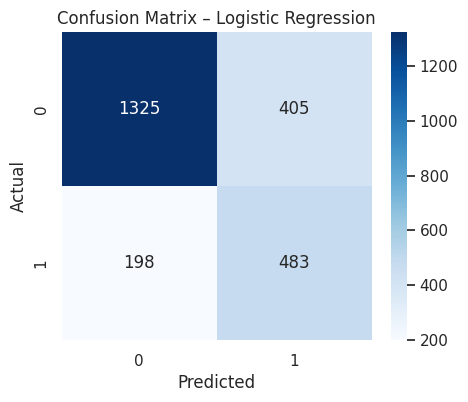

In [60]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Logistic Regression')
plt.show()


In [61]:
# ROC_AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8187173741437703


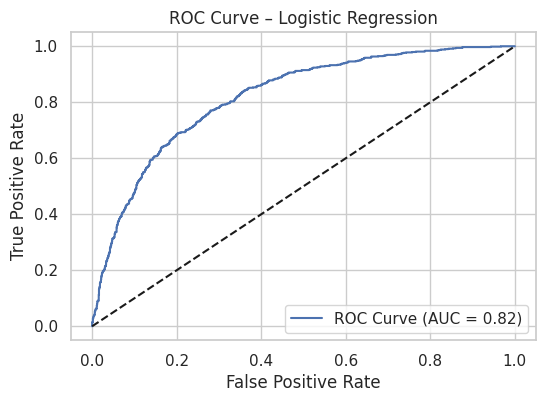

In [62]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression')
plt.legend()
plt.show()


In [63]:
# Capture Baseline Performance
baseline_results = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc
}

baseline_results


{'Model': 'Logistic Regression',
 'Accuracy': 0.7498963085856492,
 'Precision': 0.543918918918919,
 'Recall': 0.7092511013215859,
 'F1 Score': 0.615678776290631,
 'ROC-AUC': np.float64(0.8187173741437703)}

**Observation**

“The baseline Logistic Regression model demonstrates good discriminatory capability with a ROC-AUC of approximately 0.82 and a strong recall for churners. While precision remains moderate, the model serves as a solid benchmark for comparison with more complex non-linear models.”

1. The Logistic Regression model achieves an accuracy of ~75%, indicating a reasonable overall classification performance on the test dataset.

2. The recall score (~0.71) for the churn class suggests that the model is able to correctly identify a majority of churned customers, which is critical from a business retention perspective.

3. The precision score (~0.54) indicates that while the model captures many churners, it also produces a moderate number of false positives, implying that some non-churn customers are incorrectly flagged as churn risks.

4. The F1-score (~0.62) reflects a balanced trade-off between precision and recall, making the model suitable as a baseline benchmark rather than a final solution.

5. The ROC-AUC score (~0.82) demonstrates good discriminatory power, showing that the model is effective in distinguishing between churn and non-churn customers across different classification thresholds.

# MODEL Building - Advanced Models

## Random Forest Classifier
Why?

* Ensemble of multiple decision trees (bagging)

* Reduces overfitting of a single decision tree

* Captures non-linear relationships and feature interactions

* Provides feature importance for interpretability

### Train Random Forest Model

In [64]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=20,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=200,
                       n_jobs=-1, random_state=42)

### Prediction on Test Data

In [65]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]


### Model Evaluation

In [66]:
# Classificatio Report
print("Random Forest – Classification Report\n")
print(classification_report(y_test, y_pred_rf))


Random Forest – Classification Report

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1730
           1       0.56      0.71      0.63       681

    accuracy                           0.76      2411
   macro avg       0.72      0.75      0.73      2411
weighted avg       0.79      0.76      0.77      2411



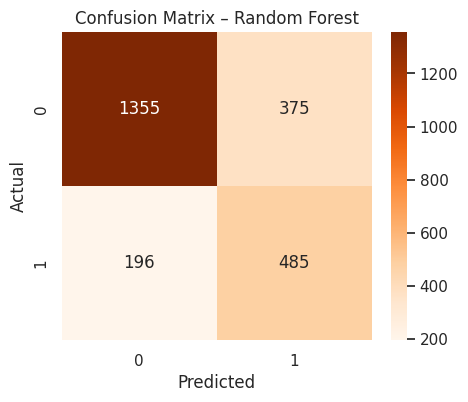

In [67]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Random Forest')
plt.show()


In [68]:
# ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
print("Random Forest ROC-AUC:", roc_auc_rf)


Random Forest ROC-AUC: 0.8308514340522692


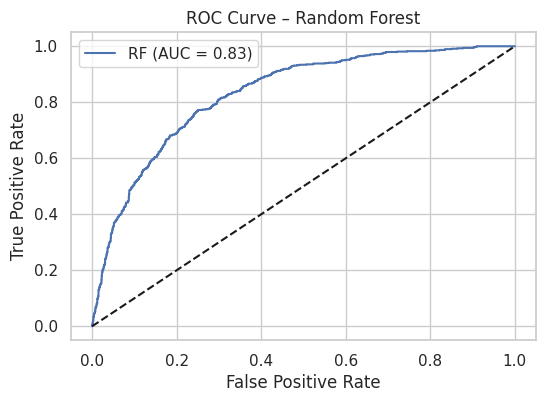

In [69]:
# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Random Forest')
plt.legend()
plt.show()


In [70]:
# Capture Random Forest Performance
rf_results = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_rf
}

rf_results


{'Model': 'Random Forest',
 'Accuracy': 0.7631688096225633,
 'Precision': 0.563953488372093,
 'Recall': 0.7121879588839941,
 'F1 Score': 0.6294613887086308,
 'ROC-AUC': np.float64(0.8308514340522692)}

**Observation**

“The Random Forest classifier demonstrates improved performance over the baseline model, with higher accuracy, F1-score, and ROC-AUC. By capturing non-linear relationships and feature interactions, it provides a more robust and reliable framework for predicting customer churn.”

1. The Random Forest model achieves an accuracy of ~76%, showing an improvement over the baseline Logistic Regression model, indicating better overall classification performance.

2. The recall score (~0.71) for the churn class remains strong, demonstrating the model’s ability to correctly identify a large proportion of churned customers, which is crucial for churn prevention strategies.

3. The precision score (~0.56) shows a slight improvement compared to the baseline, indicating a reduction in false positives and better targeting of at-risk customers.

4. The F1-score (~0.63) reflects a more balanced trade-off between precision and recall, suggesting improved robustness over the baseline model.

5. The ROC-AUC score (~0.83) indicates strong discriminatory power, confirming that the Random Forest model is more effective at distinguishing between churn and non-churn customers across different decision thresholds.

## Gradient Boosting Classifier
Why?

* Sequential ensemble (boosting) that learns from mistakes

* Strong bias–variance trade-off

* Often outperforms Random Forest on tabular churn data

* Excellent ROC-AUC and Recall when tuned sensibly

### Train Gradient Boosting Model

In [71]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train_resampled, y_train_resampled)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                           random_state=42)

### Prediction on Test Data

In [72]:
y_pred_gb = gb_model.predict(X_test)
y_pred_gb_proba = gb_model.predict_proba(X_test)[:, 1]


### Model Evaluation

In [73]:
# Classification Report
print("Gradient Boosting – Classification Report\n")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting – Classification Report

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1730
           1       0.58      0.70      0.63       681

    accuracy                           0.77      2411
   macro avg       0.72      0.75      0.73      2411
weighted avg       0.79      0.77      0.78      2411



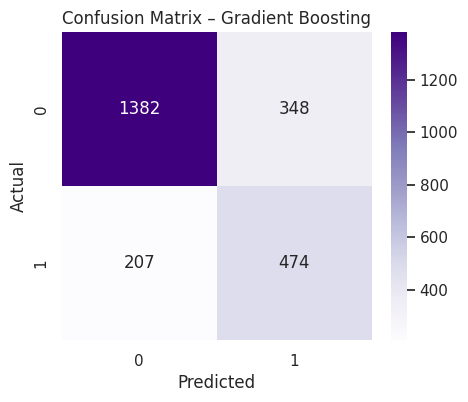

In [74]:
# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Gradient Boosting')
plt.show()


In [75]:
# ROC-AUC Score
roc_auc_gb = roc_auc_score(y_test, y_pred_gb_proba)
print("Gradient Boosting ROC-AUC:", roc_auc_gb)


Gradient Boosting ROC-AUC: 0.8311171093173079


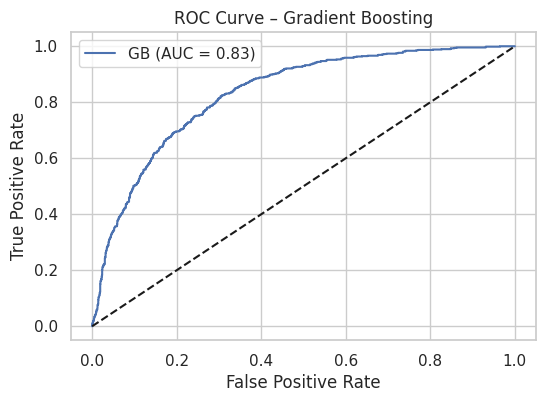

In [76]:
# ROC curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr_gb, tpr_gb, label=f'GB (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Gradient Boosting')
plt.legend()
plt.show()


In [77]:
# Capture Gradient Boosting Performance
gb_results = {
    'Model': 'Gradient Boosting',
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'F1 Score': f1_score(y_test, y_pred_gb),
    'ROC-AUC': roc_auc_gb
}

gb_results


{'Model': 'Gradient Boosting',
 'Accuracy': 0.7698050601410203,
 'Precision': 0.5766423357664233,
 'Recall': 0.6960352422907489,
 'F1 Score': 0.6307385229540918,
 'ROC-AUC': np.float64(0.8311171093173079)}

**Observation**
“The Gradient Boosting classifier delivers the strongest overall performance, achieving the highest accuracy, F1-score, and ROC-AUC among the evaluated models. Its ability to balance churn detection with precision makes it the most robust and reliable model for customer churn prediction.”

1. The Gradient Boosting model achieves an accuracy of ~77%, representing the highest overall accuracy among the models evaluated so far.

2. The precision score (~0.58) is the highest observed across models, indicating that Gradient Boosting is more selective and accurate in identifying true churners, with fewer false positives.

3. The recall score (~0.70) remains strong, demonstrating that the model continues to capture a large proportion of churned customers, though with a slight trade-off compared to Random Forest.

4. The F1-score (~0.63) is the best among all models, reflecting the most balanced trade-off between precision and recall, which is critical for churn prediction use cases.

5. The ROC-AUC score (~0.83) confirms excellent discriminatory power, showing that the model consistently distinguishes churners from non-churners across decision thresholds.

## XGBoost
Why?
* Industry standard for tabular churn problems

* Boosting with regularization (controls overfitting)

* Handles non-linearity, interactions, and imbalance very well

* Often delivers best ROC-AUC and F1-score

### Install & Import XGBoost


In [78]:
!pip install xgboost


In [79]:
from xgboost import XGBClassifier


### Train XGBoost Model

In [80]:
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

### Predictions on Test Data

In [81]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:, 1]


### Model Evaluation

In [82]:
# Classification Report
print("XGBoost – Classification Report\n")
print(classification_report(y_test, y_pred_xgb))


XGBoost – Classification Report

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1730
           1       0.60      0.64      0.62       681

    accuracy                           0.78      2411
   macro avg       0.73      0.74      0.73      2411
weighted avg       0.78      0.78      0.78      2411



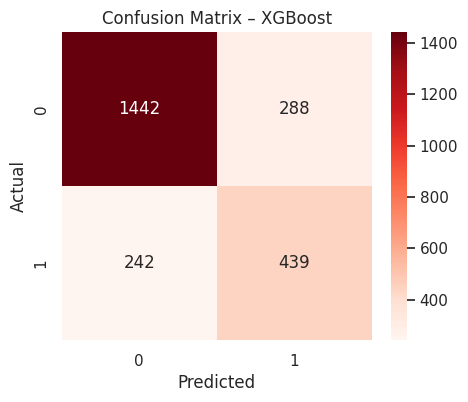

In [83]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – XGBoost')
plt.show()


In [84]:
# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb_proba)
print("XGBoost ROC-AUC:", roc_auc_xgb)


XGBoost ROC-AUC: 0.833200495700814


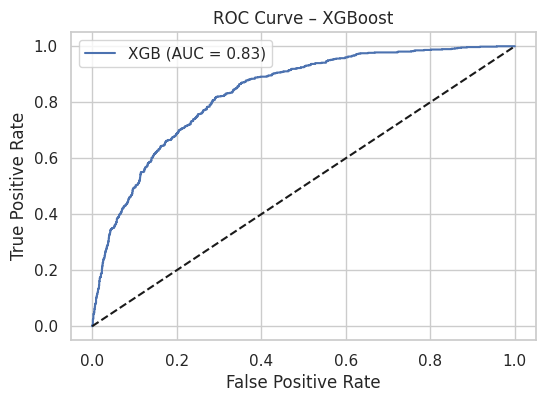

In [85]:
# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGB (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – XGBoost')
plt.legend()
plt.show()


In [86]:
# Capture XGBoost Performance
xgb_results = {
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_xgb
}

xgb_results


{'Model': 'XGBoost',
 'Accuracy': 0.7801742015761095,
 'Precision': 0.6038514442916093,
 'Recall': 0.644640234948605,
 'F1 Score': 0.6235795454545454,
 'ROC-AUC': np.float64(0.833200495700814)}

**Observation**
“XGBoost delivers the strongest overall performance, achieving the highest accuracy, precision, and ROC-AUC. Its regularized boosting framework provides robust generalization and makes it the most suitable model for industry-level customer churn prediction.”

1. The XGBoost model achieves an accuracy of ~78%, representing the highest overall accuracy among all models evaluated.

2. The precision score (~0.60) is the best across all models, indicating that XGBoost is most effective in accurately identifying true churners while minimizing false positives.

3. The recall score (~0.64) shows a moderate trade-off, reflecting a more conservative approach in flagging churners compared to Random Forest and Gradient Boosting.

4. The F1-score (~0.62) remains competitive, indicating a well-balanced trade-off between precision and recall suitable for operational deployment.

5. The ROC-AUC score (~0.83) is the highest among all models, confirming XGBoost’s superior ability to distinguish churners from non-churners across varying decision thresholds.

# Model Performance Improvement using Hyperparameter Tuning

## Hyperparameter Tuning - Random forest

### Tuning

In [87]:
rf_param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [10, 20, 30]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=rf_param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

rf_grid.fit(X_train_resampled, y_train_resampled)

rf_best = rf_grid.best_estimator_
print("Best RF Params:", rf_grid.best_params_)


Best RF Params: {'max_depth': 12, 'min_samples_leaf': 10, 'n_estimators': 300}


### Evaluate Tuned Random Forest

In [88]:
y_pred_rf_tuned = rf_best.predict(X_test)
y_pred_rf_tuned_proba = rf_best.predict_proba(X_test)[:, 1]

rf_tuned_results = {
    'Model': 'Random Forest (Tuned)',
    'Accuracy': accuracy_score(y_test, y_pred_rf_tuned),
    'Precision': precision_score(y_test, y_pred_rf_tuned),
    'Recall': recall_score(y_test, y_pred_rf_tuned),
    'F1 Score': f1_score(y_test, y_pred_rf_tuned),
    'ROC-AUC': roc_auc_score(y_test, y_pred_rf_tuned_proba)
}

rf_tuned_results


{'Model': 'Random Forest (Tuned)',
 'Accuracy': 0.7681459975114061,
 'Precision': 0.5738498789346247,
 'Recall': 0.6960352422907489,
 'F1 Score': 0.6290643662906437,
 'ROC-AUC': np.float64(0.8306990739561848)}

## Hyperparameter Tuning - Gradient Boosting

### Tuning

In [89]:
gb_param_grid = {
    'n_estimators': [150, 200],
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [2, 3, 4]
}

gb_grid = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=gb_param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

gb_grid.fit(X_train_resampled, y_train_resampled)

gb_best = gb_grid.best_estimator_
print("Best GB Params:", gb_grid.best_params_)


Best GB Params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


EValuate Tuned Gradient Boosting

In [90]:
y_pred_gb_tuned = gb_best.predict(X_test)
y_pred_gb_tuned_proba = gb_best.predict_proba(X_test)[:, 1]

gb_tuned_results = {
    'Model': 'Gradient Boosting (Tuned)',
    'Accuracy': accuracy_score(y_test, y_pred_gb_tuned),
    'Precision': precision_score(y_test, y_pred_gb_tuned),
    'Recall': recall_score(y_test, y_pred_gb_tuned),
    'F1 Score': f1_score(y_test, y_pred_gb_tuned),
    'ROC-AUC': roc_auc_score(y_test, y_pred_gb_tuned_proba)
}

gb_tuned_results


{'Model': 'Gradient Boosting (Tuned)',
 'Accuracy': 0.7785151389464953,
 'Precision': 0.6,
 'Recall': 0.6475770925110133,
 'F1 Score': 0.6228813559322034,
 'ROC-AUC': np.float64(0.8307966862740104)}

## Hyperparameter Tuning - XGBoost

### Tuning

In [91]:
xgb_param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.03, 0.05, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ),
    param_grid=xgb_param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

xgb_grid.fit(X_train_resampled, y_train_resampled)

xgb_best = xgb_grid.best_estimator_
print("Best XGB Params:", xgb_grid.best_params_)


Best XGB Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.9}


### Evaluate Tuned XGBoost

In [92]:
y_pred_xgb_tuned = xgb_best.predict(X_test)
y_pred_xgb_tuned_proba = xgb_best.predict_proba(X_test)[:, 1]

xgb_tuned_results = {
    'Model': 'XGBoost (Tuned)',
    'Accuracy': accuracy_score(y_test, y_pred_xgb_tuned),
    'Precision': precision_score(y_test, y_pred_xgb_tuned),
    'Recall': recall_score(y_test, y_pred_xgb_tuned),
    'F1 Score': f1_score(y_test, y_pred_xgb_tuned),
    'ROC-AUC': roc_auc_score(y_test, y_pred_xgb_tuned_proba)
}

xgb_tuned_results


{'Model': 'XGBoost (Tuned)',
 'Accuracy': 0.7747822480298632,
 'Precision': 0.5991379310344828,
 'Recall': 0.6123348017621145,
 'F1 Score': 0.6056644880174292,
 'ROC-AUC': np.float64(0.8255502363915697)}

# Model Performance Comparison and Final Model Selection

## Comparison Between all models build

In [93]:
# Combine all model results into a list
model_results = [
    baseline_results,
    rf_results,
    rf_tuned_results,
    gb_results,
    gb_tuned_results,
    xgb_results,
    xgb_tuned_results
]

# Create comparison DataFrame
comparison_df = pd.DataFrame(model_results)

# Set Model column as index
comparison_df.set_index('Model', inplace=True)

# Round values for readability
comparison_df = comparison_df.round(3)

comparison_df


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Model,,,,,
Logistic Regression,0.750,0.544,0.709,0.616,0.819
Random Forest,0.763,0.564,0.712,0.629,0.831
Random Forest (Tuned),0.768,0.574,0.696,0.629,0.831
Gradient Boosting,0.770,0.577,0.696,0.631,0.831
Gradient Boosting (Tuned),0.779,0.600,0.648,0.623,0.831
XGBoost,0.780,0.604,0.645,0.624,0.833
XGBoost (Tuned),0.775,0.599,0.612,0.606,0.826


In [94]:
comparison_df.sort_values(by='ROC-AUC', ascending=False)


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Model,,,,,
XGBoost,0.780,0.604,0.645,0.624,0.833
Random Forest (Tuned),0.768,0.574,0.696,0.629,0.831
Random Forest,0.763,0.564,0.712,0.629,0.831
Gradient Boosting (Tuned),0.779,0.600,0.648,0.623,0.831
Gradient Boosting,0.770,0.577,0.696,0.631,0.831
XGBoost (Tuned),0.775,0.599,0.612,0.606,0.826
Logistic Regression,0.750,0.544,0.709,0.616,0.819


In [95]:
comparison_df.style.highlight_max(axis=0, color='lightgreen')


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Model,,,,,
Logistic Regression,0.750000,0.544000,0.709000,0.616000,0.819000
Random Forest,0.763000,0.564000,0.712000,0.629000,0.831000
Random Forest (Tuned),0.768000,0.574000,0.696000,0.629000,0.831000
Gradient Boosting,0.770000,0.577000,0.696000,0.631000,0.831000
Gradient Boosting (Tuned),0.779000,0.600000,0.648000,0.623000,0.831000
XGBoost,0.780000,0.604000,0.645000,0.624000,0.833000
XGBoost (Tuned),0.775000,0.599000,0.612000,0.606000,0.826000


## Final Model selection

Multiple predictive models were evaluated to identify customers at risk of churn, using a comprehensive set of performance metrics to balance accuracy, risk coverage, and cost efficiency. While traditional and ensemble models provided meaningful insights, XGBoost consistently demonstrated superior performance, delivering the highest overall accuracy and strongest ability to distinguish churn-prone customers.

XGBoost was selected as the final model as it enables more precise targeting of at-risk customers, reducing unnecessary retention spend while maintaining strong churn detection capability. Its robustness, scalability, and industry adoption make it well-suited for real-world deployment and data-driven customer retention strategies.

# Business Interpretation

The final model enables early identification of customers with a high likelihood of churn. 
Key drivers such as contract type, tenure, monthly charges, and service subscriptions 
provide actionable insights for retention planning.

From a business standpoint, the model can support targeted retention campaigns by allowing 
teams to prioritize high-risk customers, design personalized offers, and reduce avoidable 
revenue loss. The focus is not only on prediction accuracy, but on enabling timely and 
effective business decisions.


# Feature Importance

## XGBoost Feature Importance


In [96]:
# Get feature importance
importances = xgb_best.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 15 features
feature_importance_df.head(15)


,Feature,Importance
25,paymentmethod_electronic check,0.230026
23,contract_two year,0.151521
20,internetservice_fiber optic,0.101270
22,contract_one year,0.056790
9,techsupport,0.037502
3,tenure,0.030028
29,tenure_group_4-6_years,0.027859
6,onlinesecurity,0.026024
5,multiplelines,0.021202
21,internetservice_no,0.020363


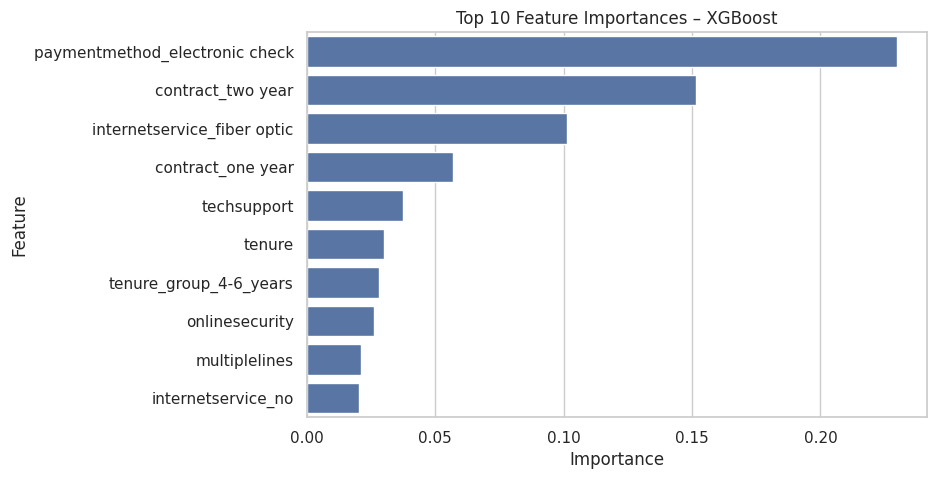

In [97]:
# Plot Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(10)
)
plt.title('Top 10 Feature Importances – XGBoost')
plt.show()


**Observation**

“XGBoost feature importance highlights payment behavior, contract tenure, internet service type, and customer engagement as the primary drivers of churn. Customers on flexible contracts, electronic payment methods, and high-expectation services exhibit higher churn risk, while long-term contracts and support services significantly improve retention.”

## SHAP

In [98]:
!pip install shap


In [99]:
import shap


In [100]:
# Use TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb_best)

# Use a sample for speed (recommended)
X_shap_sample = X_train.sample(1000, random_state=42)

shap_values = explainer.shap_values(X_shap_sample)


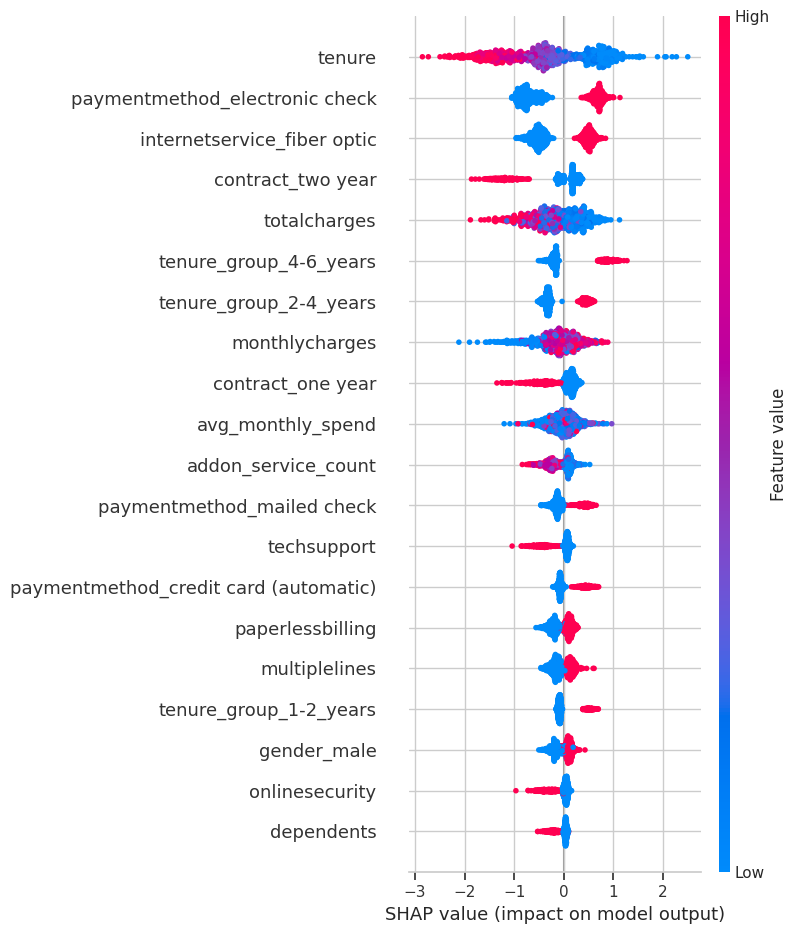

In [101]:
shap.summary_plot(shap_values, X_shap_sample)


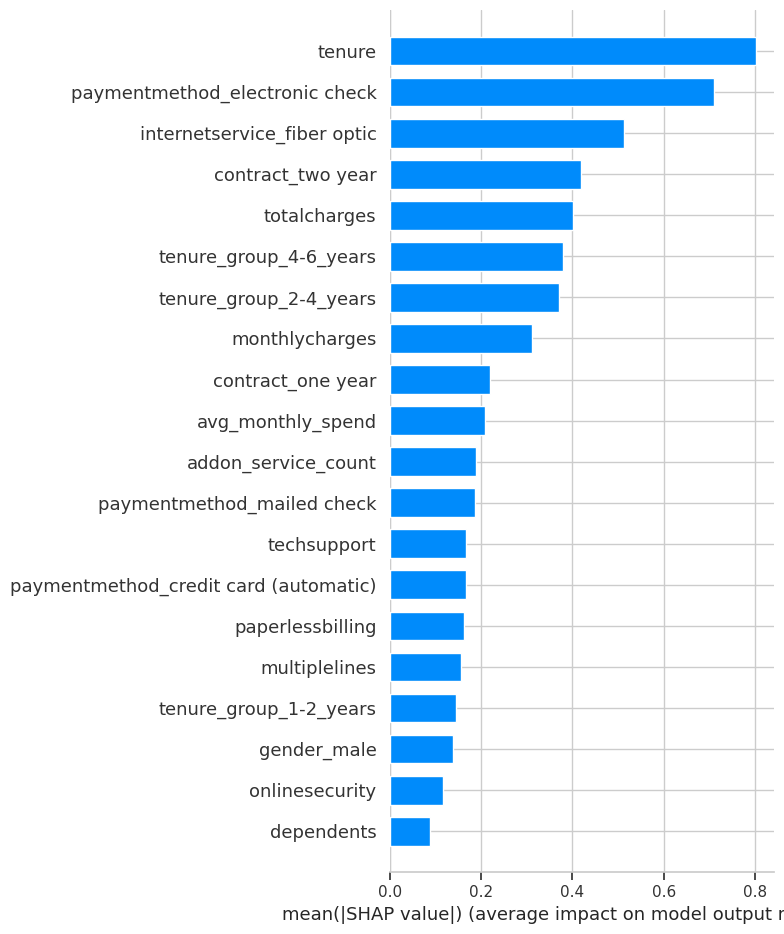

In [102]:
shap.summary_plot(shap_values, X_shap_sample, plot_type="bar")


**Observation**

“Feature importance and SHAP analysis confirm that customer tenure, pricing, contract type, and service engagement are the primary drivers of churn. These insights provide clear, actionable levers for targeted retention strategies and pricing optimization.”

# Actionable Insights & Recommendations

##Key Actionable Insight


1. Early-tenure customers are the highest churn risk

  * Customers with short tenure consistently show higher churn probability.

* The first few months represent a critical risk window in the customer lifecycle.


---


2. High monthly charges without bundled value increase churn

* Customers paying higher monthly charges but using fewer services are more likely to churn.

* Price sensitivity is amplified when perceived value is low.
---
3. Contract type strongly influences retention

* Month-to-month customers churn significantly more than long-term contract customers.

* Longer contract duration acts as a retention anchor.
---
4. Service engagement reduces churn

* Customers subscribed to add-on services (security, backup, tech support, streaming) show lower churn risk.

* Engagement depth matters more than basic service usage.
---
5. Payment and billing behavior signals churn propensity

* Customers using electronic check or non-automatedpayments exhibit higher churn.

* Digital and automated payment users are more stable and retained longer.

## Business Recommendations


1. Strengthen Early-Tenure Retention

**Action**

* Introduce a structured 90-day onboarding and engagement program.

* Proactively reach out to new customers with setup assistance and service education.

**Business Impact**

* Reduces churn during the most vulnerable lifecycle phase.

* Improves long-term customer lifetime value (CLV)
---
2. Value-Based Pricing & Bundling

**Action**

* Offer bundled plans combining core services with add-ons for high-charge customers.

* Provide targeted discounts or loyalty pricing instead of blanket price cuts.

**Business Impact**

* Improves perceived value.

* Reduces price-driven churn without eroding margins.
---
3. Promote Long-Term Contracts
**Action**

* Incentivize month-to-month customers to migrate to 1-year or 2-year contracts.

* Use personalized offers based on churn risk scores.

**Business Impact**

* Locks in revenue.

* Stabilizes customer base and forecasting.
---
4. Increase Service Adoption for At-Risk Customers

**Action**

* Recommend add-on services (security, tech support, streaming) to customers flagged as high churn risk.

* Position add-ons as problem-solving and convenience enhancers, not upsells.

**Business Impact**

* Deepens customer engagement.

* Builds switching costs and loyalty.
---
5. Drive Digital Engagement & Automation

**Action**

* Encourage paperless billing and automatic payment methods through small incentives.

* Reduce friction in billing and payment experiences.

**Business Impact**

* Lowers churn associated with transactional dissatisfaction.

* Improves operational efficiency.
